<a href="https://colab.research.google.com/github/dgambone3/CSC6740_Data_Mining_Project/blob/main/DM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fetal Health Classification**
#### An analysis of fetal health based on results from cardiotocography (CTG) results

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils import resample
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Step 1: Preprocessing

### Load and View Data
Drop unnecessary columns pertaining to histogram results, which aren't typically a part of CTG results. 

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DM_Project/fetal_health.csv')
feat = data[['baseline value', 
              'accelerations', 
              'fetal_movement',
              'uterine_contractions', 
              'light_decelerations', 
              'severe_decelerations',
              'prolongued_decelerations', 
              'abnormal_short_term_variability',
              'mean_value_of_short_term_variability',
              'mean_value_of_long_term_variability',
              'percentage_of_time_with_abnormal_long_term_variability',
              'fetal_health']]
feat = feat.rename(columns={'percentage_of_time_with_abnormal_long_term_variability':'percent_time_abnormal_long_variability'})
data.shape

(2126, 22)

Assign feature and target values, X and y, respectively.


In [ ]:
X = feat[['baseline value', 
          'accelerations', 
          'fetal_movement',
          'uterine_contractions', 
          'light_decelerations', 
          'severe_decelerations',
          'prolongued_decelerations', 
          'abnormal_short_term_variability',
          'mean_value_of_short_term_variability',
          'mean_value_of_long_term_variability',
          'percent_time_abnormal_long_variability']]
y = feat[['fetal_health']]

In [ ]:
feat.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
mean_value_of_long_term_variability,2126.0,8.187629,5.628247,0.0,4.600,7.400,10.800,50.700


In [ ]:
feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   baseline value                          2126 non-null   float64
 1   accelerations                           2126 non-null   float64
 2   fetal_movement                          2126 non-null   float64
 3   uterine_contractions                    2126 non-null   float64
 4   light_decelerations                     2126 non-null   float64
 5   severe_decelerations                    2126 non-null   float64
 6   prolongued_decelerations                2126 non-null   float64
 7   abnormal_short_term_variability         2126 non-null   float64
 8   mean_value_of_short_term_variability    2126 non-null   float64
 9   mean_value_of_long_term_variability     2126 non-null   float64
 10  percent_time_abnormal_long_variability  2126 non-null   floa

### Data Normalization 

In [ ]:
# Scale data with standard scalar
sc = StandardScaler().set_output(transform='pandas')
scaled = sc.fit(X).transform(X)

### Dimensionality Reduction - Principal Component Analysis


In [ ]:
pca = PCA()
pca.fit(scaled)
d = {'Feature':scaled.columns.values, 'PCA Variance Ratio':pca.explained_variance_ratio_}
pca_info = pd.DataFrame(data=d)
l=[]

for z in range(1, len(pca_info['PCA Variance Ratio']) + 1):
  l.append(sum(pca_info['PCA Variance Ratio'].iloc[:z]))

pca_info['Sum PCA Variance'] = l
display(pca_info)

,Feature,PCA Variance Ratio,Sum PCA Variance
0,baseline value,0.250640,0.250640
1,accelerations,0.148219,0.398859
2,fetal_movement,0.107775,0.506633
3,uterine_contractions,0.102701,0.609334
4,light_decelerations,0.089323,0.698657
5,severe_decelerations,0.076052,0.774709
6,prolongued_decelerations,0.066112,0.840821
7,abnormal_short_term_variability,0.059541,0.900362
8,mean_value_of_short_term_variability,0.043945,0.944307
9,mean_value_of_long_term_variability,0.036622,0.980929


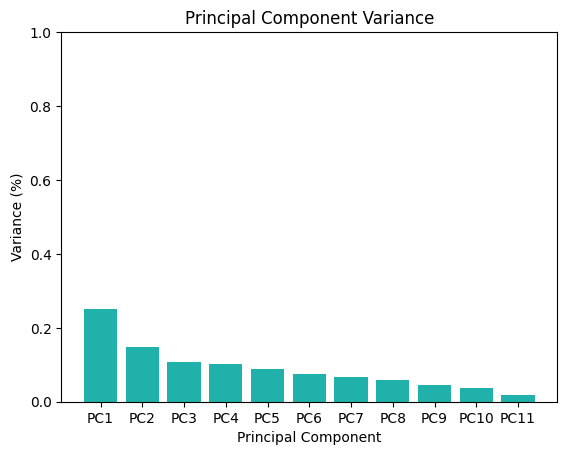

In [ ]:
trained_pca = pca.transform(scaled)
var_ratio = pca_info['PCA Variance Ratio']

x=range(0, len(var_ratio))
plt.bar(x, var_ratio, color='lightseagreen')
plt.ylabel('Variance (%)')
plt.xlabel('Principal Component')
plt.xticks(x, ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'])
plt.ylim([0,1])
plt.title('Principal Component Variance')
plt.show()

# Step 2: Data Analysis

### Classifier Distribution

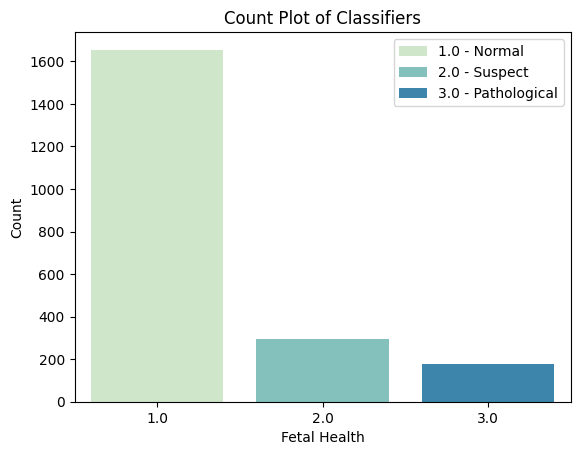

In [ ]:
labels = ['1.0 - Normal', '2.0 - Suspect', '3.0 - Pathological']
sns.countplot(data, x='fetal_health', palette='GnBu', label=labels)
plt.title('Count Plot of Classifiers')
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.legend()
plt.show()

### Correlation Matrix

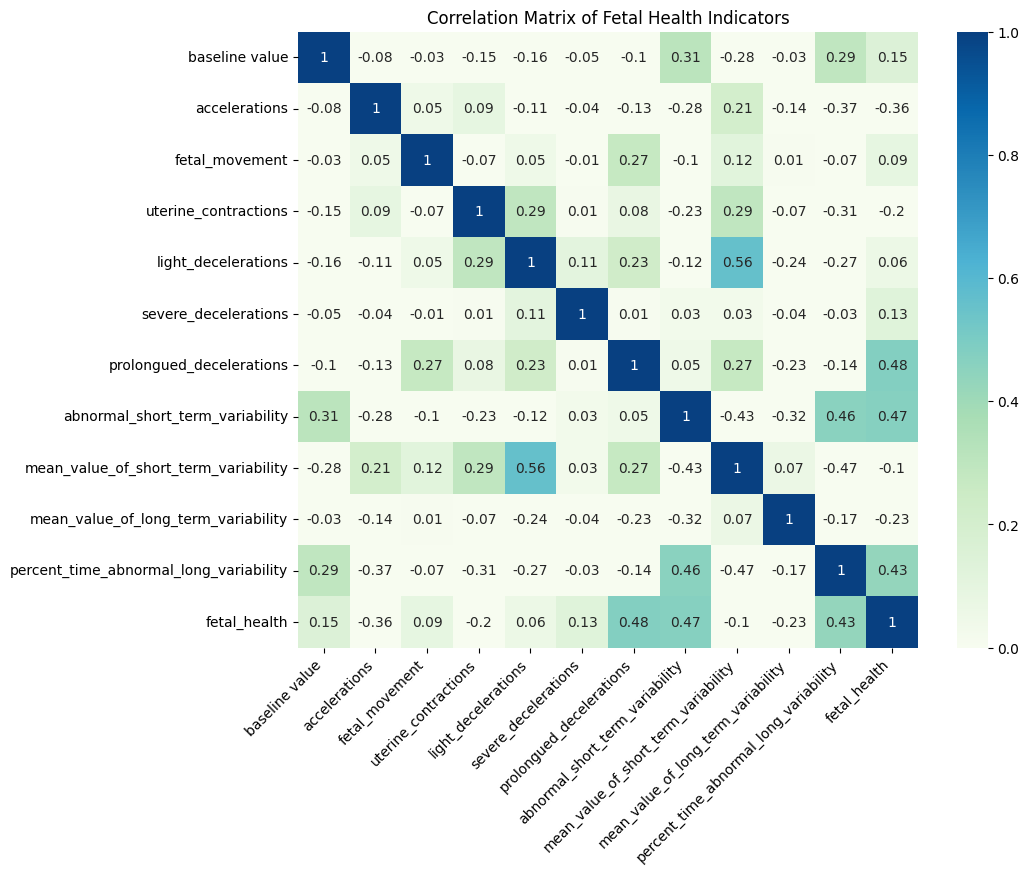

In [ ]:
corr = round(feat.corr(), 2)
fig = plt.figure(figsize=(10,8))
axes = fig.subplots()

sns.heatmap(corr, vmin=0, vmax=1, annot=True, cmap='GnBu')

plt.title('Correlation Matrix of Fetal Health Indicators')
plt.xticks(ha='right', rotation=45)
plt.show()

### View Data Distribution - Box Plots

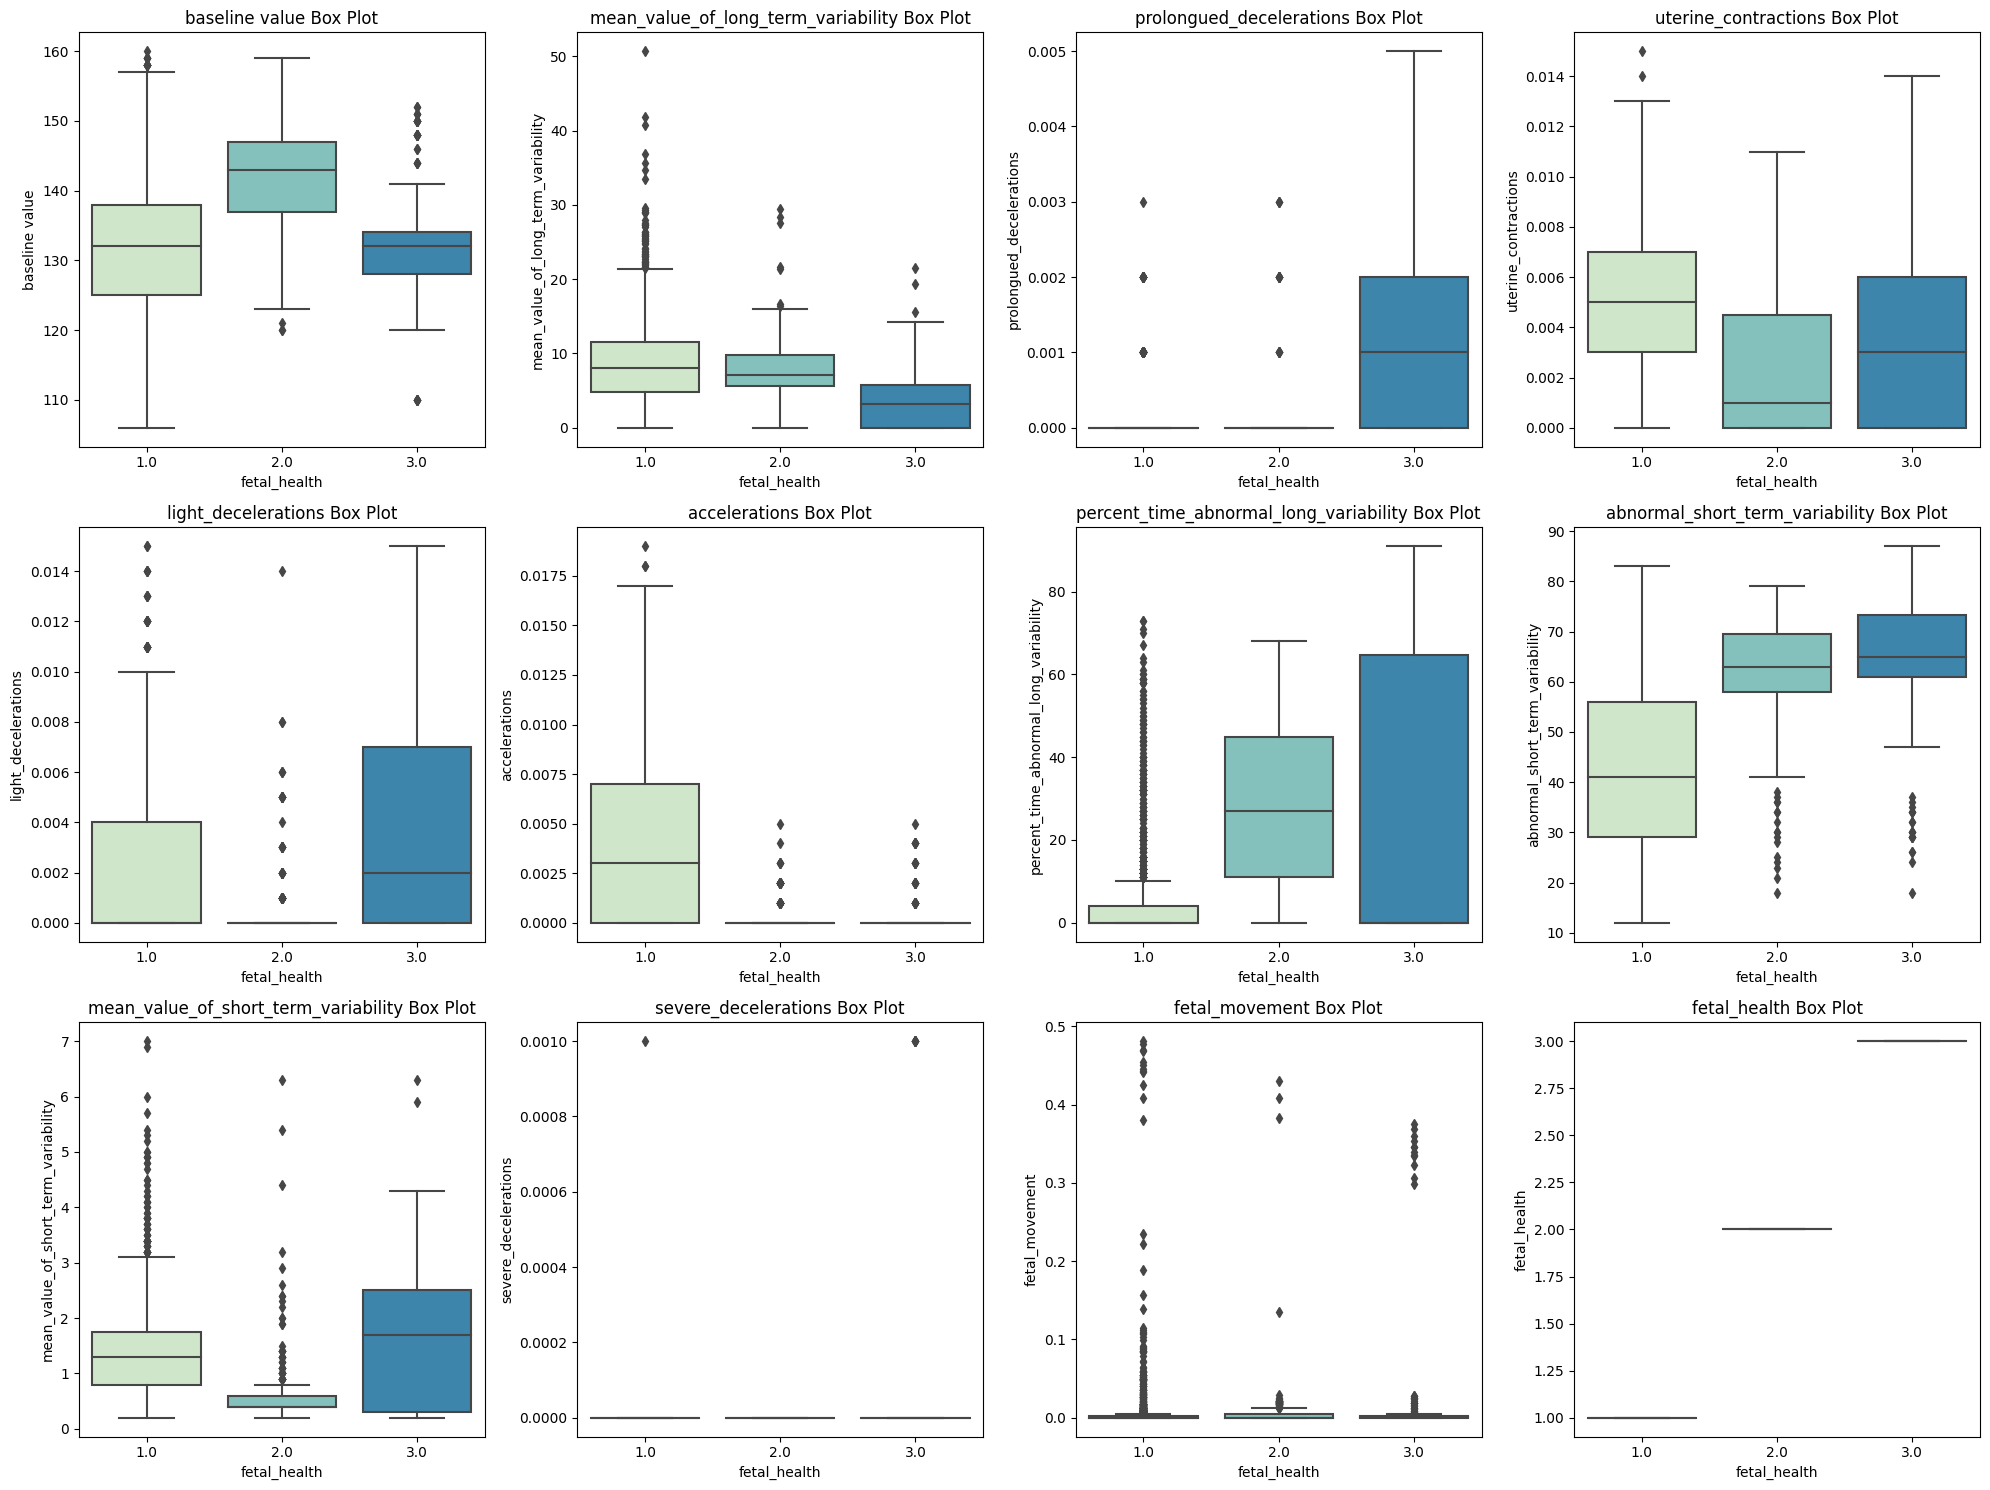

In [ ]:
fig = plt.figure(figsize=(20,15))
axes = fig.subplots(3,4)
i = 0
j = 0
for col in feat[:-2]:
  sns.boxplot(x=feat['fetal_health'], 
              y = feat[col], 
              data=feat, 
              ax=axes[i,j], 
              palette='GnBu')
  axes[i,j].set_title(f'{col} Box Plot')
  i+=1
  j+=1
  if j == 4: j=0
  if i == 3: i=0
fig.tight_layout()
plt.show()

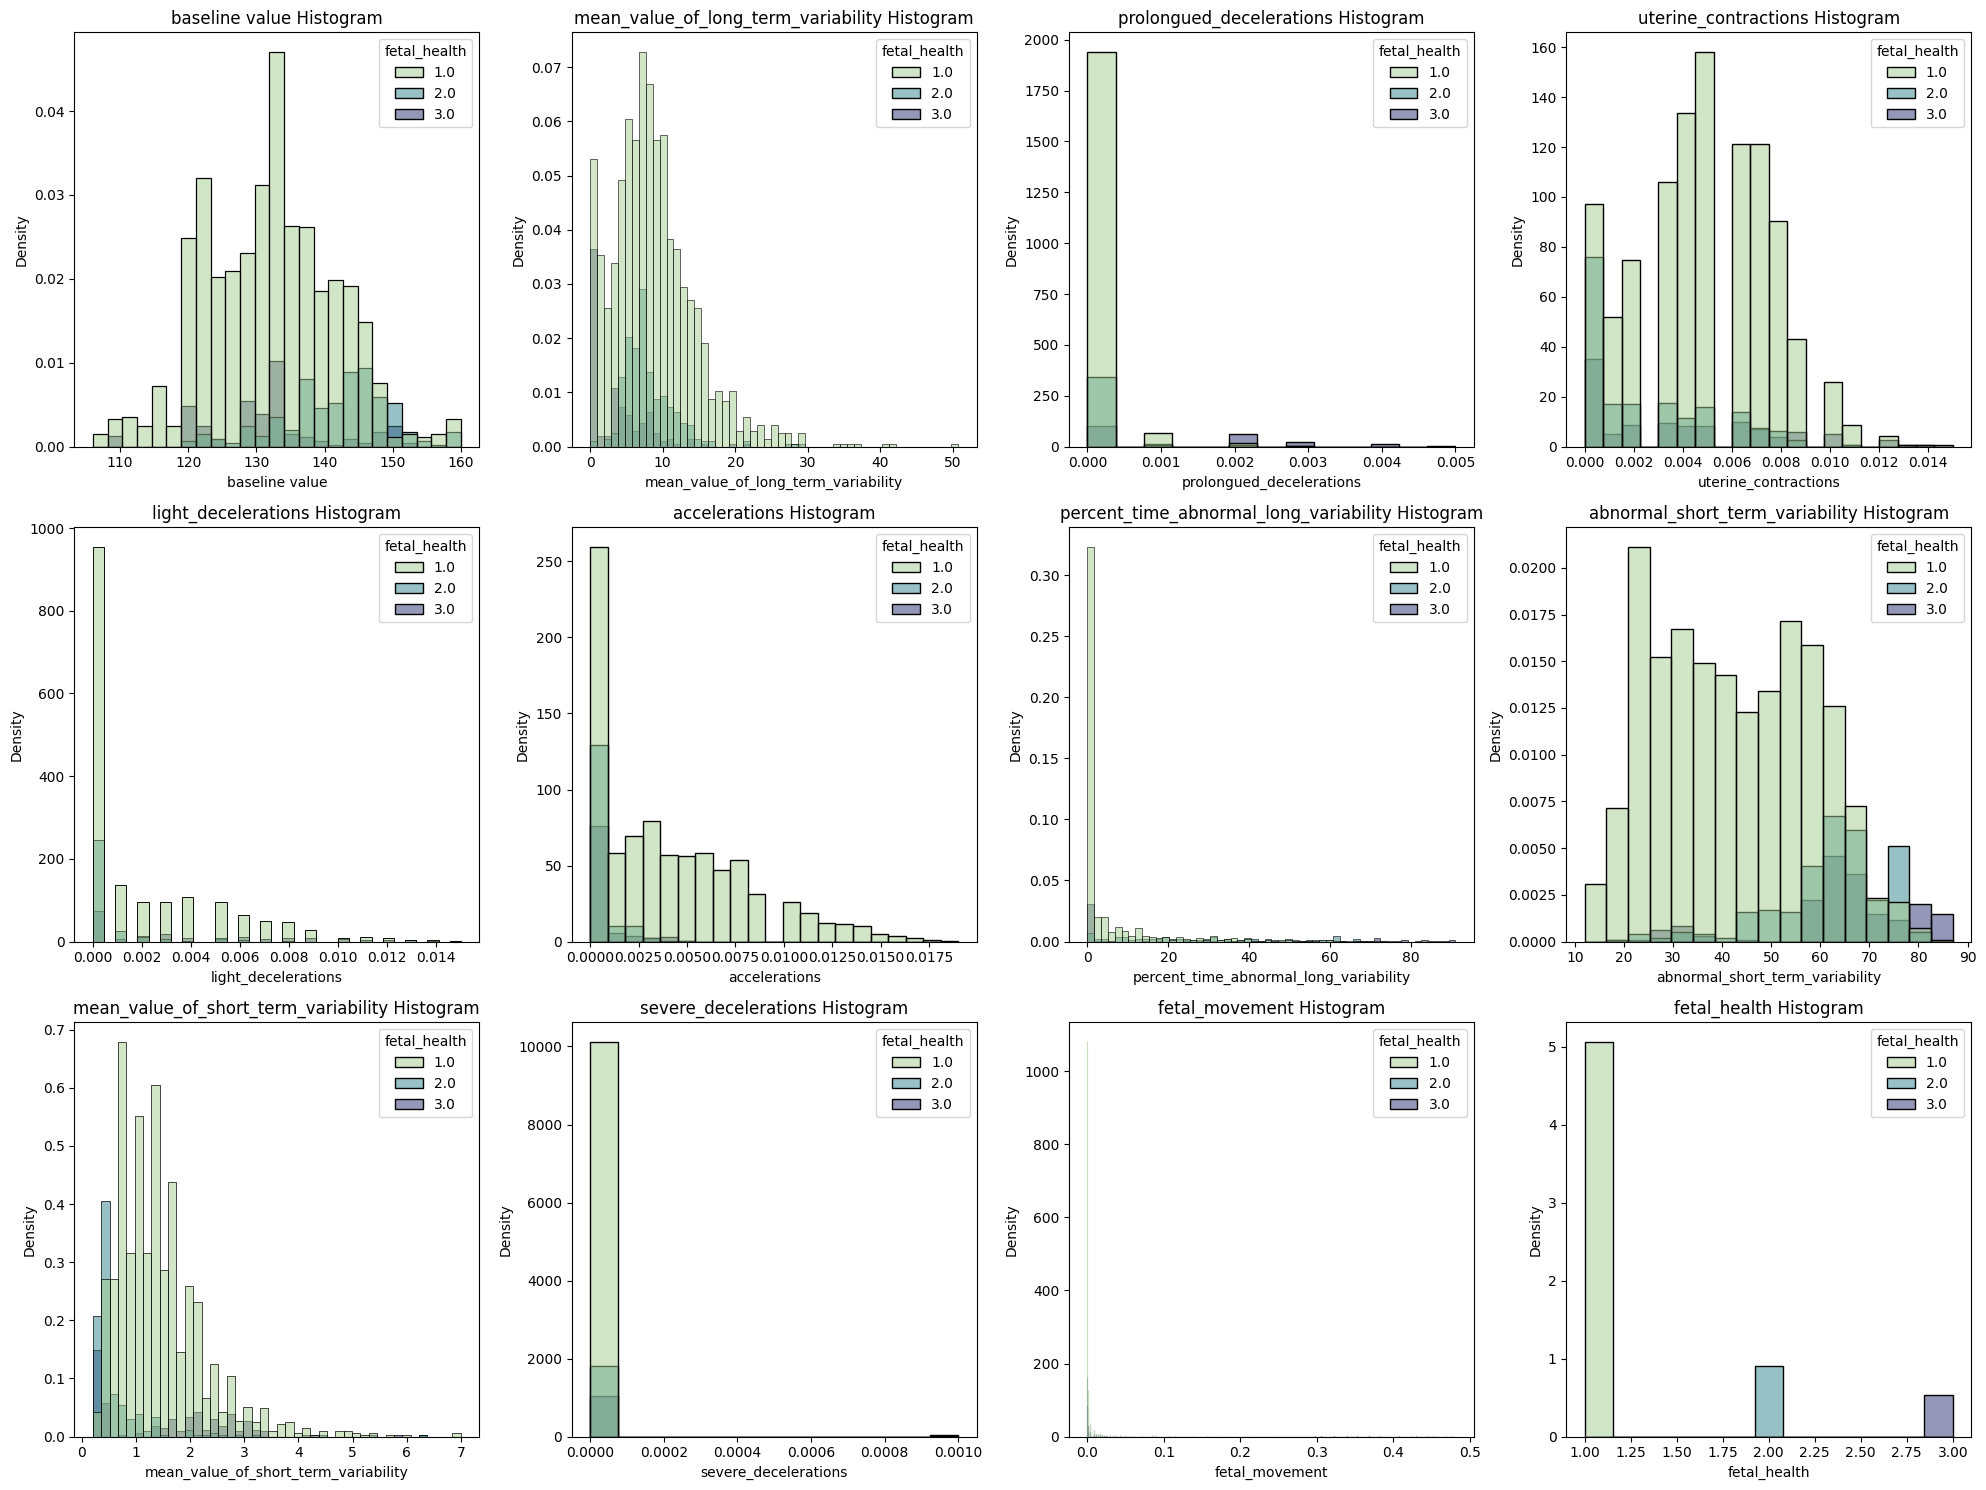

In [ ]:
fig = plt.figure(figsize=(20,15))
axes = fig.subplots(3,4)
i = 0
j = 0
for col in feat[:-2]:
  sns.histplot(data=feat,
                x=feat[col], 
                hue=feat['fetal_health'],
                stat='density',
                palette='crest',
                ax=axes[i,j],)
  axes[i,j].set_title(f'{col} Histogram')
  i+=1
  j+=1
  if j == 4: j=0
  if i == 3: i=0
fig.tight_layout()
plt.show()

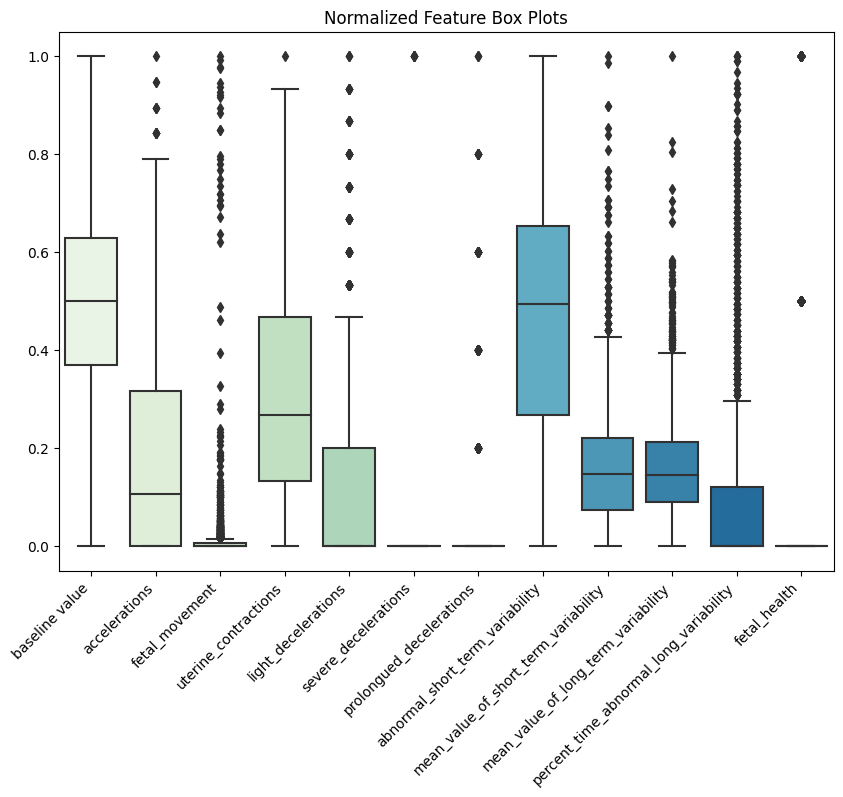

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1)).set_output(transform='pandas')
range_scaled = minmax.fit_transform(feat)
fig = plt.figure(figsize=(10,7))
sns.boxplot(range_scaled,
            palette='GnBu')
plt.title('Normalized Feature Box Plots')
plt.xticks(ha='right',rotation=45)
plt.show()

# Step 3: Model Evaluation

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
sc = StandardScaler().set_output(transform='pandas')
X_temp = feat.iloc[:, :-1]
X = sc.fit(X_temp).transform(X_temp).values
y = feat.iloc[:, -1].values
sss = StratifiedShuffleSplit(n_splits=2, 
                           train_size=0.8, 
                           test_size=0.2, 
                           random_state=1234)

for i, (train_index, test_index) in enumerate(sss.split(X, y)):
  X_train = X[train_index]
  y_train = y[train_index]

  X_test = X[test_index]
  y_test = y[test_index]
print(X_train.shape)

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test) # for ROC curves

(1700, 11)


In [ ]:
def plot_split_results(data, param_dict, model_name):
  data = data.drop(columns=['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
                            'mean_test_score', 'std_test_score', 'std_train_score',
                            'rank_test_score', 'split0_train_score', 'split1_train_score',
                            'split2_train_score', 'split3_train_score', 'split4_train_score',
                            'split5_train_score', 'split6_train_score', 'split7_train_score',
                            'split8_train_score', 'split9_train_score', 'mean_train_score',])
  
  fig = plt.figure(figsize=(15,5))
  axes = fig.subplots(1, len(param_dict), sharey=True) 
  
  for i, (param_name, param_range) in enumerate(param_dict.items()):
    fig.suptitle(f'10-Fold Cross-Validation Results for {model_name} Hyper-Parameters', fontsize=15)
    grouped = data.groupby(by=f'param_{param_name}').agg('mean').T
    grouped.index = np.arange(1, len(grouped) + 1)

    sns.lineplot(grouped, palette='ocean', ax=axes[i])
    axes[i].set(title=param_name, 
                xlabel='Fold', 
                ylabel='Score', 
                visible=True)
    axes[i].set_xticks(grouped.index)
    axes[i].legend()
  plt.show()

In [ ]:
def plot_ROC_curve(mod, XX_train, yy_train, XX_test):
  fig = plt.figure(figsize=(15,5))
  axes=fig.subplots(1,2)
  ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                          y_pred=pred,
                                          cmap='GnBu', 
                                          ax=axes[0])
  axes[0].set(title=f'{model_names[i]} Confusion Matrix')
  try:
    y_score = mod.fit(XX_train, yy_train).predict_proba(XX_test)
  except:
    m = CalibratedClassifierCV(mod) 
    m.fit(XX_train, yy_train)
    y_score = m.predict_proba(XX_test)

  print(classification_report(y_test, pred))
  RocCurveDisplay.from_predictions(y_onehot_test.ravel(),
                                    y_score.ravel(),
                                    name="Micro-Average One-vs-Rest",
                                    color="navy",
                                    ax=axes[1])
  axes[1].set(title=f'{model_names[i]} ROC Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')
  axes[1].plot([0, 1], [0, 1], label="chance level (AUC = 0.5)", color='lightgreen', linestyle='--')
  plt.legend()
  plt.show()


In [ ]:
def plot_decision_boundary(mod):
  X_train_corr = X_temp[['abnormal_short_term_variability', 'percent_time_abnormal_long_variability']]

  mod.fit(X_train_corr, y)

  disp = DecisionBoundaryDisplay.from_estimator(mod,
                                                X_train_corr,
                                                response_method="predict",
                                                alpha=0.5,
                                                xlabel='Abnormal Short Term Variability',
                                                ylabel='Percent Time Abnormal Long Variability',
                                                cmap='GnBu')

  decision_function = mod.decision_function(X_train_corr)
  support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
  support_vectors = X_train_corr.values[support_vector_indices]

  scat = plt.scatter(X_train_corr.iloc[:, 0], 
                      X_train_corr.iloc[:, 1], 
                      c=y, 
                      edgecolors="k", 
                      cmap='GnBu')
  plt.title('Decision Boundaries for Linear Support Vector Machine')

  handles, labels = scat.legend_elements()
  labels = ['1.0 - Normal', '2.0 - Suspect', '3.0 - Pathological']
  plt.legend(handles=handles, labels=labels)

  plt.show()

In [ ]:
model_names = ['Decision Tree',
              'Support Vector Machine',
              'Gradient Boost',
              'k-Nearest Neighbors',
              'Logistic Regression']

dt = DecisionTreeClassifier(class_weight='balanced')

svm = SVC(class_weight='balanced')

gb = GradientBoostingClassifier()

knn = KNeighborsClassifier()

logreg = LogisticRegression(class_weight='balanced')

models = [dt, svm, gb, knn, logreg]

In [ ]:
dt_params = {'criterion':('gini', 'entropy', 'log_loss'),
             'max_features':('auto', 'sqrt', 'log2'),
             'splitter':('random', 'best')}

svm_params = {'C':(1.0, 1.25, 1.5, 1.75, 2.0),
              'kernel':('linear', 'rbf', 'poly', 'sigmoid'),
              'degree':(1,2,3,4,5)}

gb_params = {'criterion':('friedman_mse', 'squared_error'),
             'loss':('log_loss', 'deviance'),
             'n_estimators':(100, 150, 200, 250)}

knn_params = {'metric':('manhattan','euclidean','cosine'),
              'weights':('uniform', 'distance'),
              'n_neighbors':(3, 5, 7, 9)}

logreg_params = {'C':(1.0, 1.25, 1.5, 1.75, 2.0),
                 'penalty': ('l1', 'l2'), 
                 'solver': ['liblinear']}

param_grids = [dt_params, svm_params, gb_params, knn_params, logreg_params]

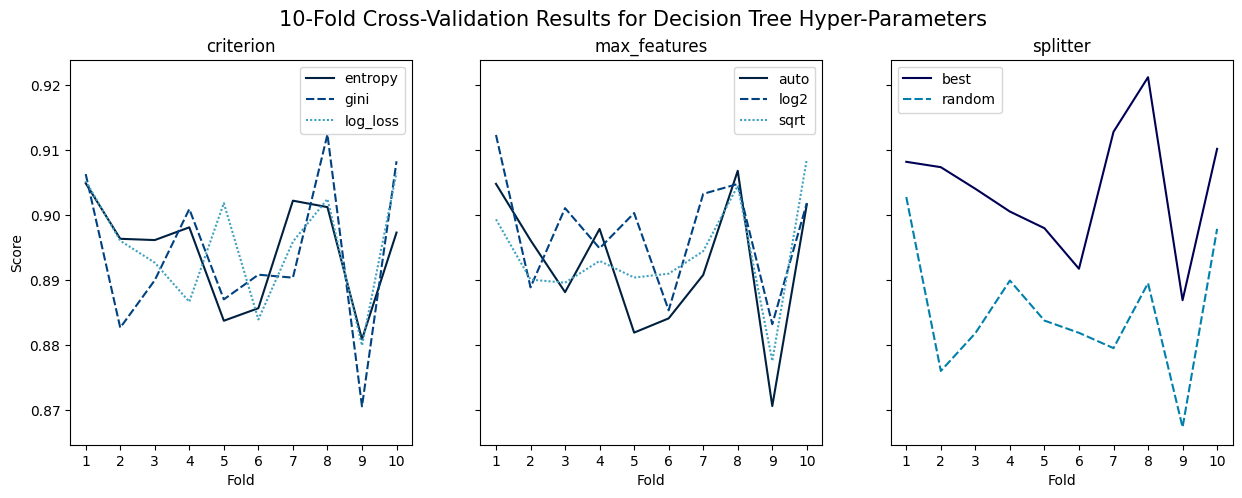


    -------  DecisionTreeClassifier  -------  
  The best estimator: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_features='auto')
  The best score: 0.9107
  The best parameters: {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}

              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       332
         2.0       0.80      0.68      0.73        59
         3.0       0.82      0.80      0.81        35

    accuracy                           0.91       426
   macro avg       0.85      0.81      0.83       426
weighted avg       0.91      0.91      0.91       426



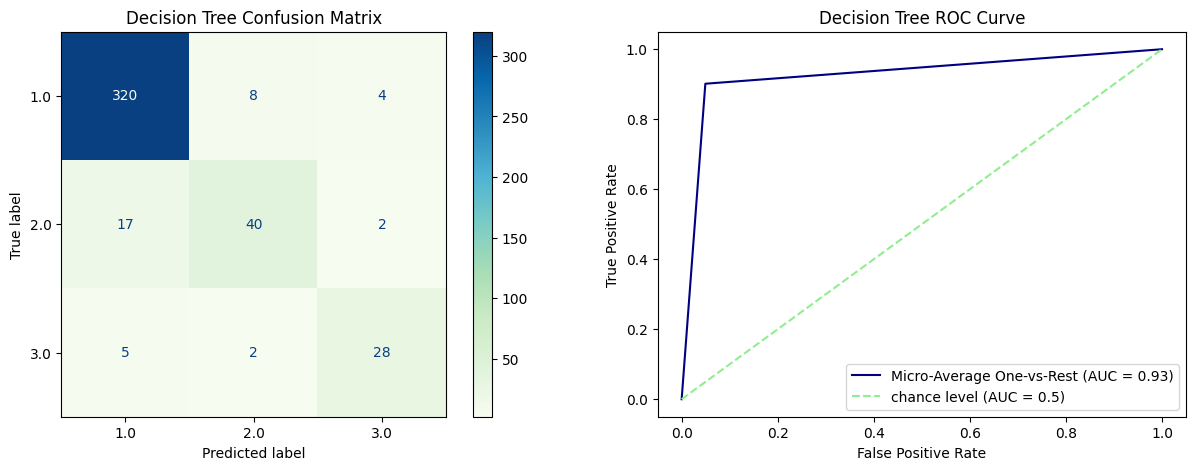

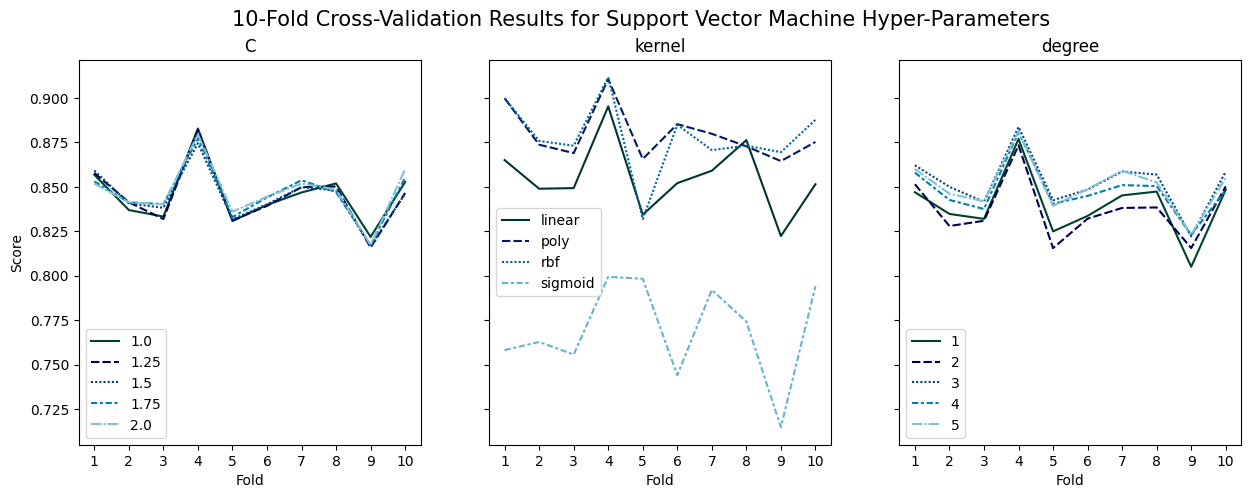


    -------  SVC  -------  
  The best estimator: SVC(class_weight='balanced', kernel='poly')
  The best score: 0.9091
  The best parameters: {'C': 1.0, 'degree': 3, 'kernel': 'poly'}

              precision    recall  f1-score   support

         1.0       0.96      0.93      0.94       332
         2.0       0.71      0.81      0.76        59
         3.0       0.78      0.83      0.81        35

    accuracy                           0.90       426
   macro avg       0.82      0.86      0.83       426
weighted avg       0.91      0.90      0.91       426



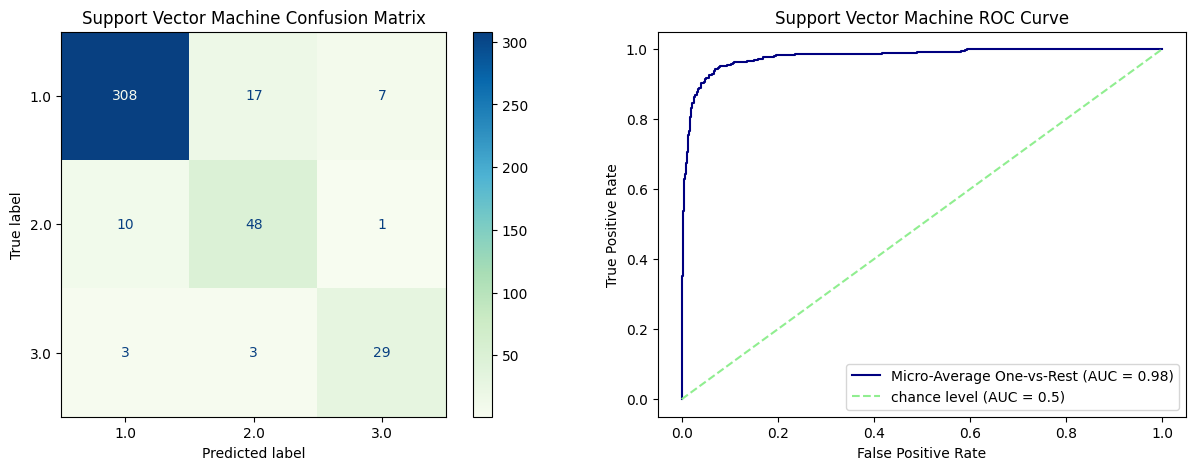

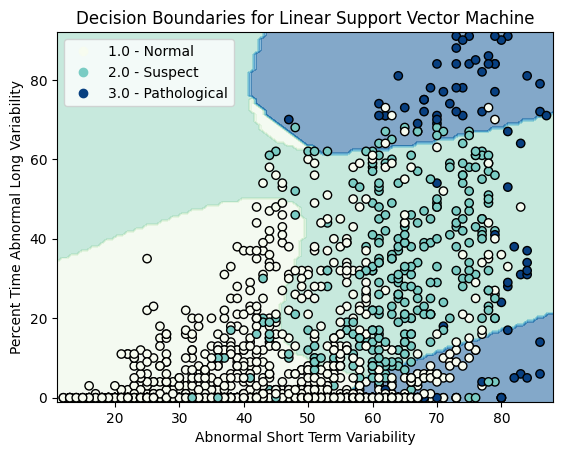

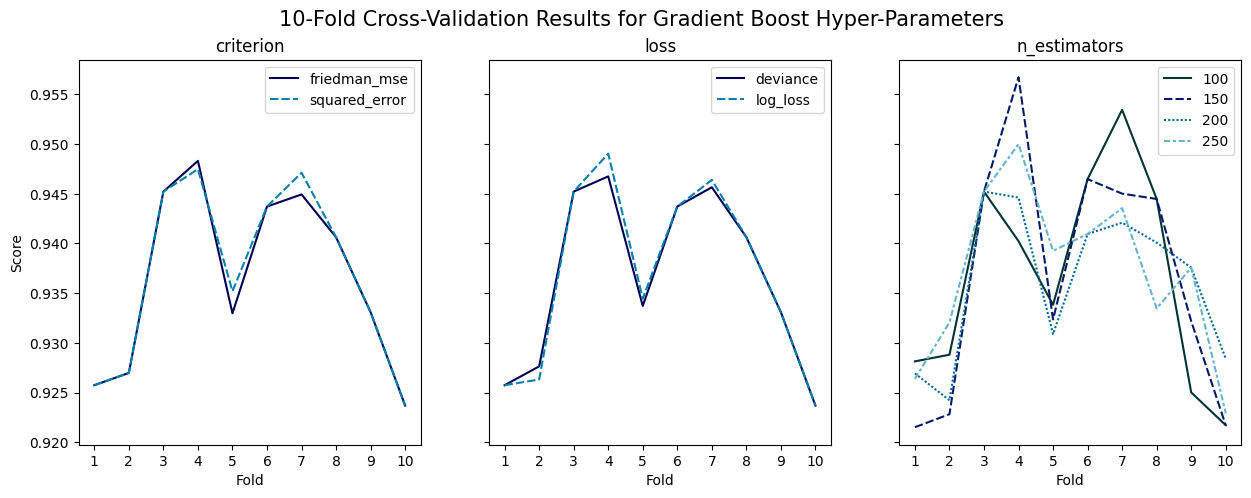


    -------  GradientBoostingClassifier  -------  
  The best estimator: GradientBoostingClassifier(criterion='squared_error', loss='deviance')
  The best score: 0.9376
  The best parameters: {'criterion': 'squared_error', 'loss': 'deviance', 'n_estimators': 100}

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       332
         2.0       0.85      0.75      0.79        59
         3.0       0.91      0.89      0.90        35

    accuracy                           0.94       426
   macro avg       0.90      0.87      0.89       426
weighted avg       0.93      0.94      0.94       426



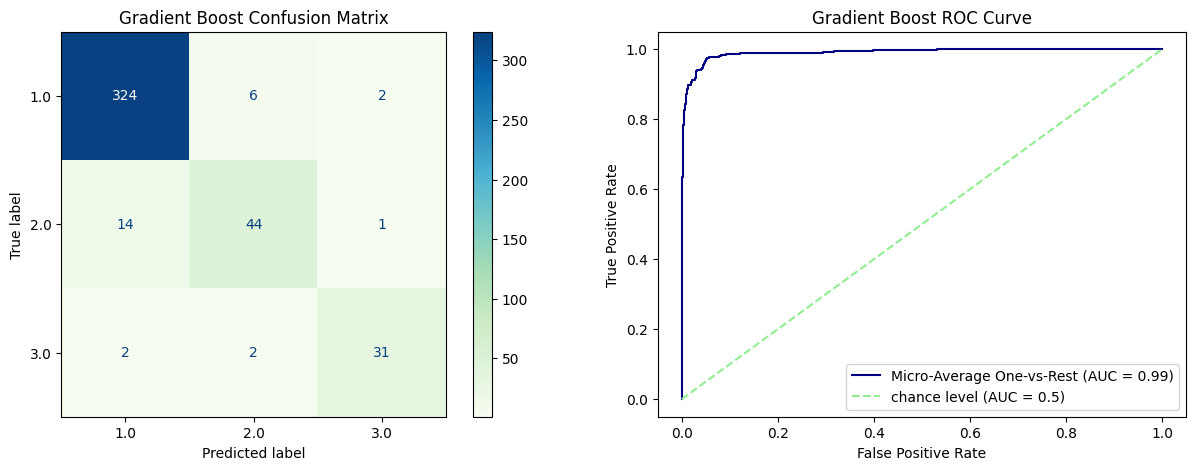

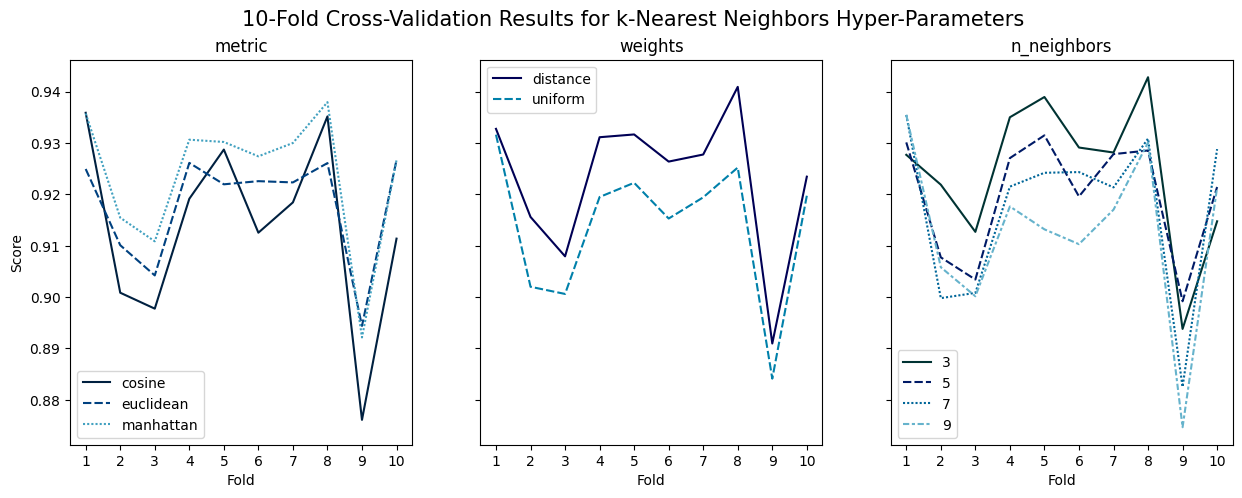


    -------  KNeighborsClassifier  -------  
  The best estimator: KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')
  The best score: 0.9293
  The best parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       332
         2.0       0.71      0.66      0.68        59
         3.0       0.88      0.83      0.85        35

    accuracy                           0.91       426
   macro avg       0.84      0.82      0.83       426
weighted avg       0.91      0.91      0.91       426



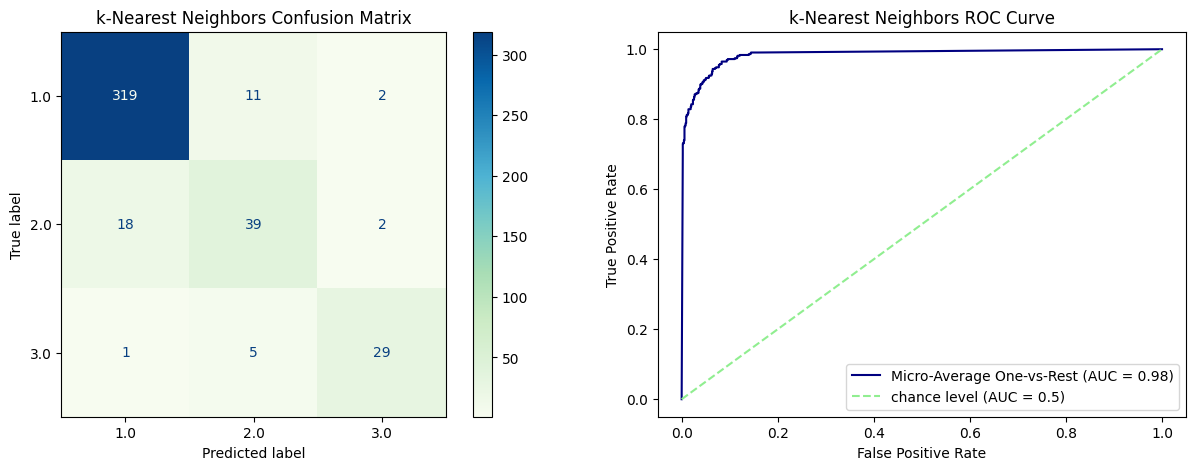

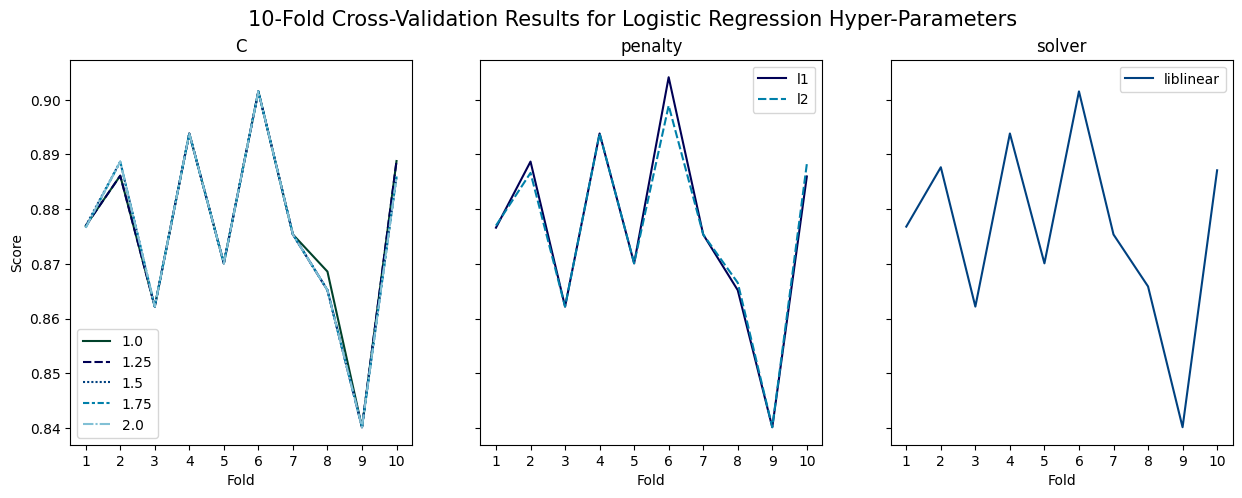


    -------  LogisticRegression  -------  
  The best estimator: LogisticRegression(class_weight='balanced', solver='liblinear')
  The best score: 0.8765
  The best parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

              precision    recall  f1-score   support

         1.0       0.96      0.91      0.93       332
         2.0       0.69      0.75      0.72        59
         3.0       0.62      0.80      0.70        35

    accuracy                           0.88       426
   macro avg       0.76      0.82      0.78       426
weighted avg       0.89      0.88      0.88       426



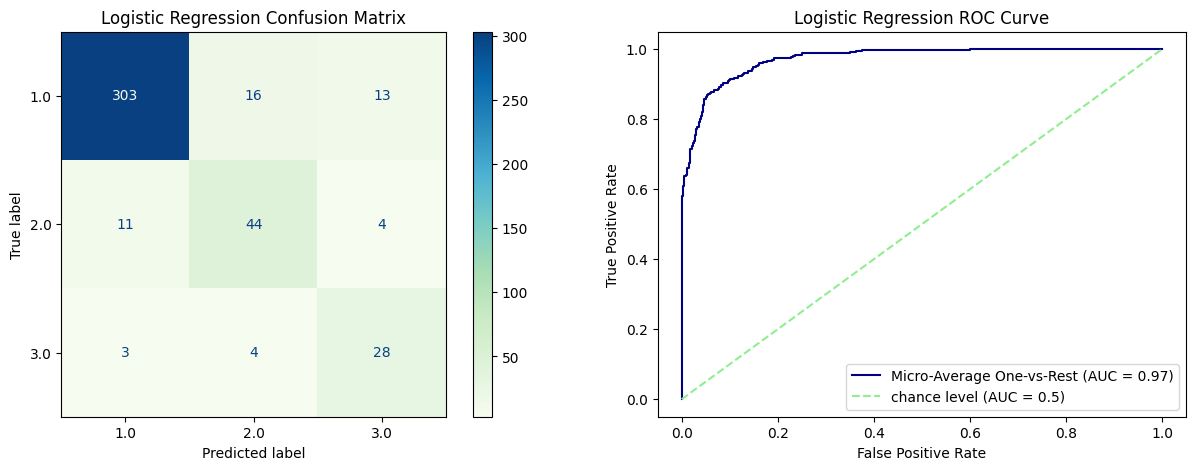

In [ ]:
for i in range(len(models)):
  grid = GridSearchCV(estimator=models[i], 
                      param_grid=param_grids[i],
                      scoring='f1_weighted',
                      return_train_score=True,
                      cv=10)
  grid.fit(X_train, y_train)
  results = pd.DataFrame(grid.cv_results_)#.loc[:,'params':'split9_test_score']
  plot_split_results(results, param_grids[i], model_names[i])

  print(f'\n    -------  {type(models[i]).__name__}  -------  ')
  print(f'  The best estimator: {grid.best_estimator_}')
  print(f'  The best score: {round(grid.best_score_, 4)}')
  print(f'  The best parameters: {grid.best_params_}\n')
  # display(results[['params', 'rank_test_score', 
  #                 'mean_test_score', 'std_test_score', 
  #                 'mean_train_score', 'std_train_score']])
  
  model = grid.best_estimator_
  pred = grid.predict(X_test)

  plot_ROC_curve(model, X_train, y_train, X_test)
  if model_names[i] == 'Support Vector Machine':
    plot_decision_boundary(model)

# Step 4: Model Interpretation